# Import the libraries

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

# Defining the dataset

In [2]:
# Function to generate a random sequence
def generate_sequence(n):   
    in_seq = []
    for i in range(n):
        bit = np.random.randint(0,2)
        in_seq.append(bit)
    return in_seq

# Function which returns 0 or 1 if the input parity sequence is odd or even
def parity(sequence):    
    k = 1
    for bit in sequence:
        if(bit == 0):
            bit = -1
        k*= bit
    if(k == -1):
        return 0
    return 1

# Sequence parity function to return the output parity sequence
def sequence_parity_func(sequence):    
  seq = []
  k = 1
  for bit in range(len(sequence)):
    n = parity(sequence[:k])
    seq.append(n)
    k = k+1
  return seq

In [3]:
# EXAMPLE: Taken from the assignment

seq=np.array([0, 1, 0, 1, 1, 0])
print(sequence_parity_func(seq))

# output must be: [0, 0, 1, 1, 1, 0]

[0, 0, 1, 1, 1, 0]


In [4]:
# Generate 2000 random 0/1 sequences of length 6

data = []
for i in range(2000):
    data.append(generate_sequence(6))

print("Data: \n")

for seq in data[:5]:
    print("Input Sequence: ",seq,"\nOutput Sequence:",sequence_parity_func(seq),"\n")

Data: 

Input Sequence:  [0, 0, 1, 1, 0, 0] 
Output Sequence: [0, 1, 1, 1, 0, 1] 

Input Sequence:  [1, 0, 0, 1, 0, 1] 
Output Sequence: [1, 0, 1, 1, 0, 0] 

Input Sequence:  [1, 1, 0, 0, 1, 0] 
Output Sequence: [1, 1, 0, 1, 1, 0] 

Input Sequence:  [1, 0, 1, 1, 1, 0] 
Output Sequence: [1, 0, 0, 0, 0, 1] 

Input Sequence:  [0, 1, 1, 1, 0, 0] 
Output Sequence: [0, 0, 0, 0, 1, 0] 



In [5]:
# Input sequence list
data[:5]

[[0, 0, 1, 1, 0, 0],
 [1, 0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 0],
 [1, 0, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 0]]

In [6]:
# Output sequence list
y = []

for seq in data:
    y.append(sequence_parity_func(seq))

In [7]:
# Output sequence list
y[0:5]

[[0, 1, 1, 1, 0, 1],
 [1, 0, 1, 1, 0, 0],
 [1, 1, 0, 1, 1, 0],
 [1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 0]]

In [8]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=46)

# Converting the data into array
X_train , y_train = np.array(X_train),np.array(y_train)
X_test , y_test = np.array(X_test),np.array(y_test)

In [9]:
# Expanding the dimension of input for RNN models
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [10]:
print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}")

X_train shape: (1600, 6, 1)
X_test shape: (400, 6, 1)


In [11]:
y_train = np.expand_dims(y_train, -1)

In [12]:
print(X_train.shape,y_train.shape)

(1600, 6, 1) (1600, 6, 1)


# Model building

In [13]:
# Creating the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(60, activation='relu',input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))
model.add(SimpleRNN(60, activation='relu', return_sequences=True,dropout = 0.2, recurrent_dropout = 0.2))
model.add(SimpleRNN(60,activation = 'relu',return_sequences = True))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation ='sigmoid'))

In [14]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6, 60)             3720      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 6, 60)             7260      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 6, 60)             7260      
                                                                 
 dense (Dense)               (None, 6, 64)             3904      
                                                                 
 dense_1 (Dense)             (None, 6, 1)              65        
                                                                 
Total params: 22,209
Trainable params: 22,209
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Compiling the model
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
# Training the model and checking the validation accuracy
history = model.fit(X_train,y_train,batch_size=32,validation_data=(X_test,y_test),epochs=15)

Epoch 1/15
50/50 [==============================] - 7s 44ms/step - loss: 0.6867 - accuracy: 0.5501 - val_loss: 0.6668 - val_accuracy: 0.6187
Epoch 2/15
50/50 [==============================] - 1s 17ms/step - loss: 0.6507 - accuracy: 0.5895 - val_loss: 0.5632 - val_accuracy: 0.6463
Epoch 3/15
50/50 [==============================] - 1s 18ms/step - loss: 0.5820 - accuracy: 0.6524 - val_loss: 0.4228 - val_accuracy: 0.8275
Epoch 4/15
50/50 [==============================] - 1s 16ms/step - loss: 0.5560 - accuracy: 0.6879 - val_loss: 0.3898 - val_accuracy: 0.8442
Epoch 5/15
50/50 [==============================] - 1s 17ms/step - loss: 0.5314 - accuracy: 0.7261 - val_loss: 0.3408 - val_accuracy: 0.9483
Epoch 6/15
50/50 [==============================] - 1s 16ms/step - loss: 0.5298 - accuracy: 0.7220 - val_loss: 0.3465 - val_accuracy: 0.9454
Epoch 7/15
50/50 [==============================] - 1s 16ms/step - loss: 0.5194 - accuracy: 0.7457 - val_loss: 0.3512 - val_accuracy: 0.9408
Epoch 8/15
50

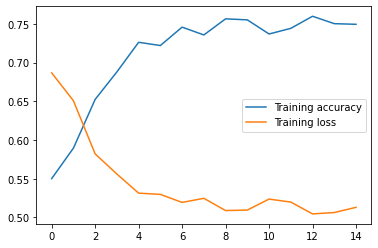

In [17]:
# Checking the training loss and accuracy
plt.plot(history.history['accuracy'],label = 'Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.legend()

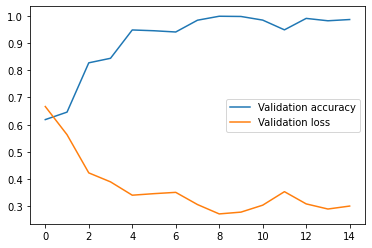

In [18]:
# Checking validation loss and accuracy
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

# State Transition diagram

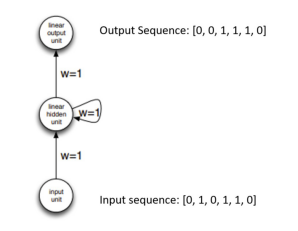

In [19]:
i = plt.imread("State_transition_diagram.jpg")
plt.imshow(i)
plt.axis("off")
plt.show()

Figure above shows an RNN which finds parity of input at a particular time. All of the units are linear. 

* If the hidden-to-output weight is 1, it means the output unit just copies the hidden activation.

* If the hidden-to-hidden weight is 1, it means that in the absence of any input, the hidden unit just remembers its previous value.

* If the input-to-hidden weight is 1, it means the input gets added to the hidden activation in every time step.


# Parameters of the network: 
* **1 Simple RNN Input layer:** having 60 RNN cells, using 'ReLU' activation function

* **2 Simple RNN Hidden layers:** having 60 RNN cells each, using 'ReLU' activation function 

* **1 Dense layer:** having 64 RNN cells, using 'ReLU' activation function 

* **1 Dense/Output layer:** having 1 RNN cells using 'Sigmoid' activation function 

**Loss function:** Binary cross-entropy -> computes loss between true labels and predicted labels.

We use this cross-entropy loss for binary (0 or 1) classification applications

**Optimizer:** Adam optimizer function is used in this problem statement